In [20]:
import json
import matplotlib.pyplot as plt
from collections import Counter

In [21]:
# Load split datasets
with open("train.json", "r", encoding="utf-8") as f:
    train_data = json.load(f)
with open("val.json", "r", encoding="utf-8") as f:
    val_data = json.load(f)
with open("test.json", "r", encoding="utf-8") as f:
    test_data = json.load(f)

In [22]:
# Function to count occurrences of a key in dataset
def count_occurrences(data, key_func):
    counter = Counter()
    for entry in data:
        counter[key_func(entry)] += 1
    return counter

In [23]:
# Define key functions for counting
intent_count = lambda entry: entry["intent"]
room_count = lambda entry: tuple(sorted(entry["rooms"]))
action_count = lambda entry: tuple(sorted((action["room"], action["action"]) for action in entry["actions"]))


In [24]:
# Compute distributions
train_intents = count_occurrences(train_data, intent_count)
val_intents = count_occurrences(val_data, intent_count)
test_intents = count_occurrences(test_data, intent_count)

In [25]:
train_rooms = count_occurrences(train_data, room_count)
val_rooms = count_occurrences(val_data, room_count)
test_rooms = count_occurrences(test_data, room_count)

In [26]:
train_actions = count_occurrences(train_data, action_count)
val_actions = count_occurrences(val_data, action_count)
test_actions = count_occurrences(test_data, action_count)


In [27]:
# Function to plot distributions using horizontal bars
def plot_horizontal_distribution(train, val, test, title, xlabel, ylabel, limit=None):
    labels = list(set(train.keys()).union(set(val.keys())).union(set(test.keys())))
    labels.sort()

    if limit:
        labels = labels[:limit]  # Show only the top 'limit' most frequent labels

    train_values = [train[label] if label in train else 0 for label in labels]
    val_values = [val[label] if label in val else 0 for label in labels]
    test_values = [test[label] if label in test else 0 for label in labels]

    y = range(len(labels))
    
    plt.figure(figsize=(12, len(labels) // 2))
    plt.barh(y, train_values, height=0.3, label="Train", alpha=0.7)
    plt.barh([i + 0.3 for i in y], val_values, height=0.3, label="Validation", alpha=0.7)
    plt.barh([i + 0.6 for i in y], test_values, height=0.3, label="Test", alpha=0.7)

    plt.yticks(y, labels)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.legend()
    plt.show()

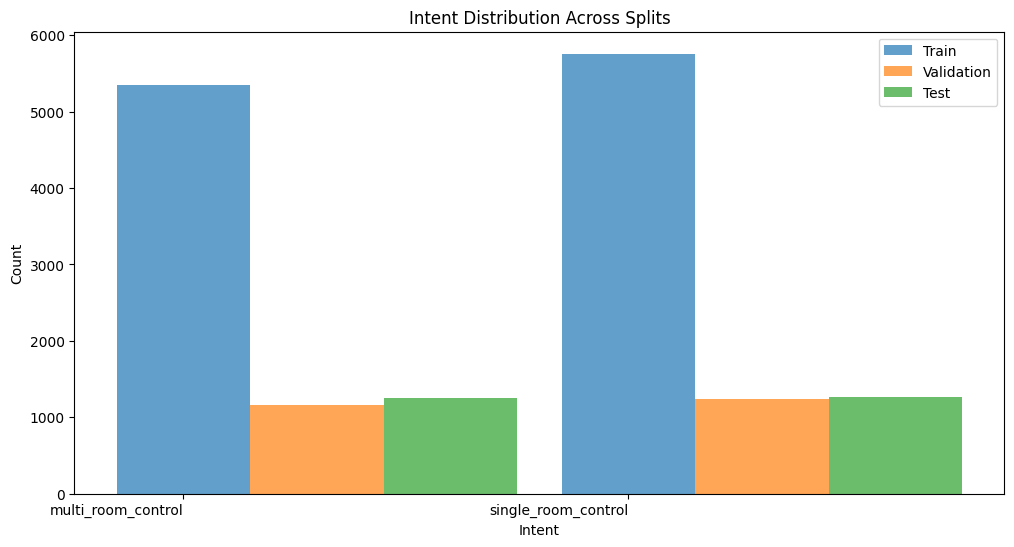

In [28]:
# Plot intent distribution
plot_distribution(train_intents, val_intents, test_intents, "Intent Distribution Across Splits", "Intent", "Count", rotation=0)

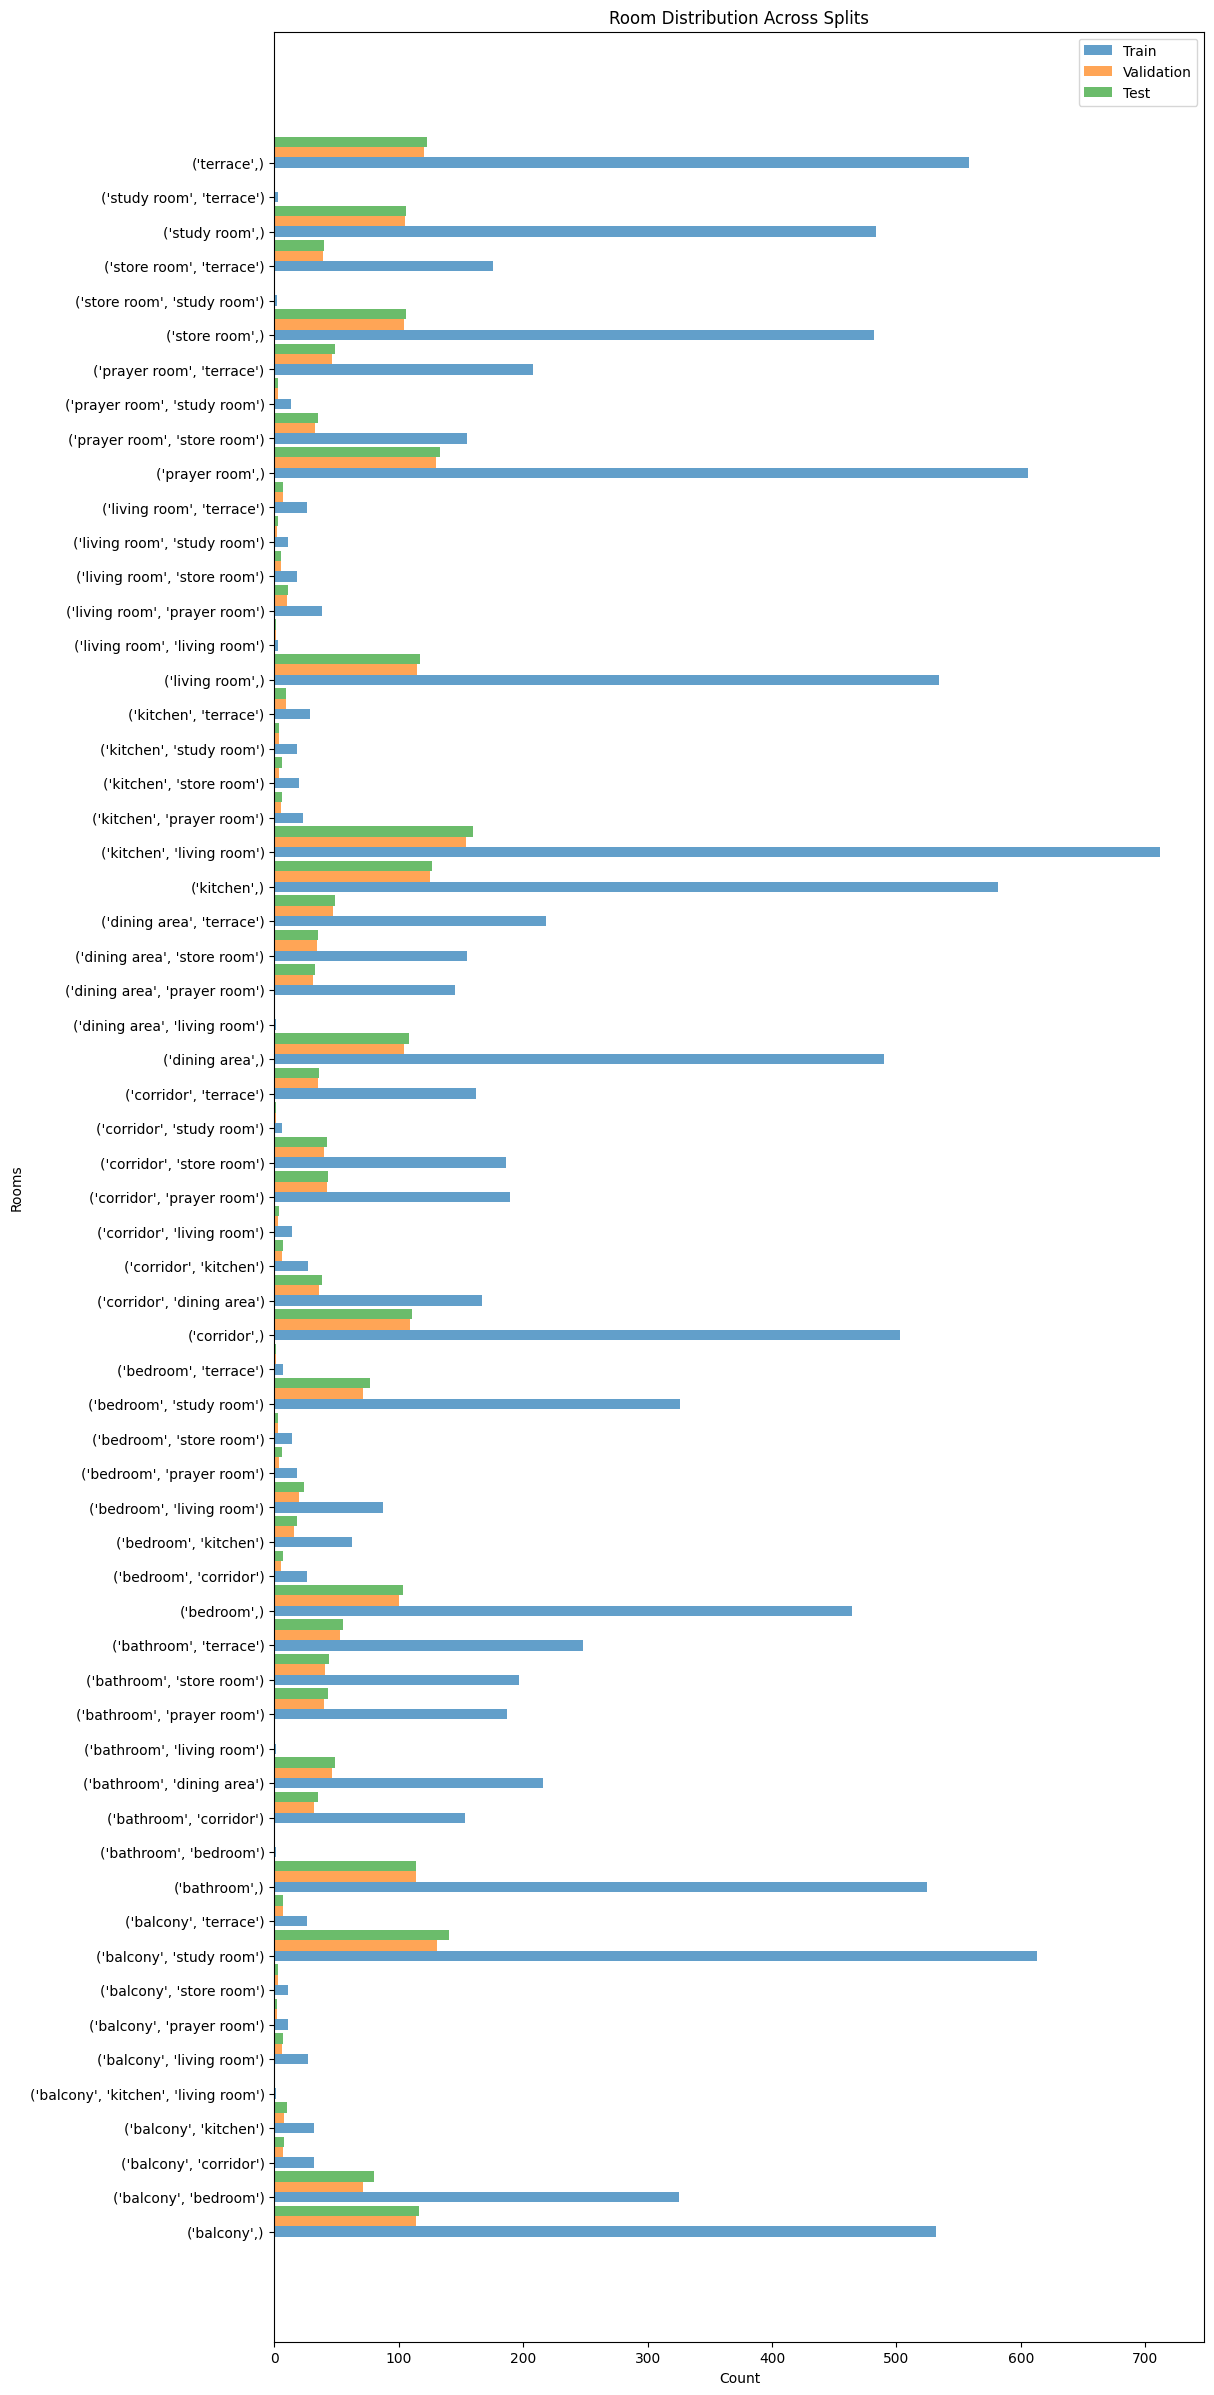

In [ ]:
# Plot room distribution
plot_horizontal_distribution(train_rooms, val_rooms, test_rooms, 
                             "Room Distribution Across Splits", "Count", "Rooms")

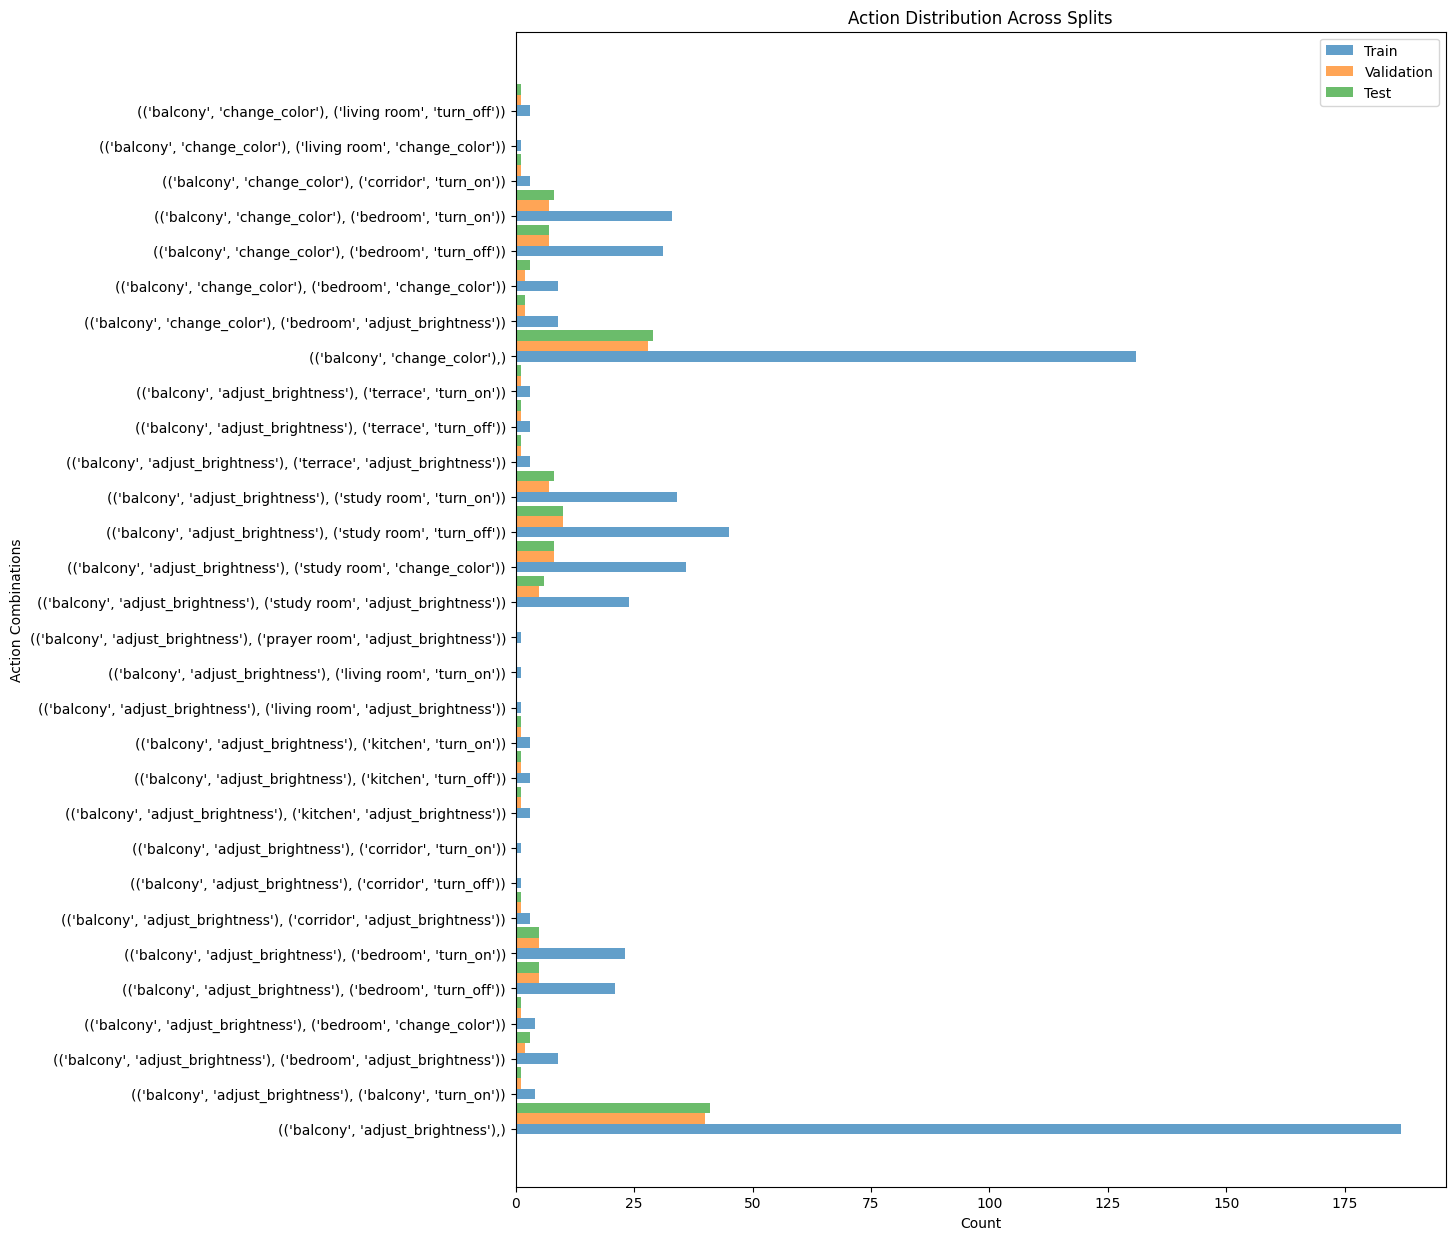

In [30]:
# Plot action distribution (limit to top 30 actions for readability)
plot_horizontal_distribution(train_actions, val_actions, test_actions, 
                             "Action Distribution Across Splits", "Count", "Action Combinations", limit=30)

### This part onwards has been done to check for any missing rooms in val or test set. 

In [31]:
from collections import Counter

# Count room occurrences in each split
train_room_counts = Counter(tuple(sorted(entry["rooms"])) for entry in train_data)
val_room_counts = Counter(tuple(sorted(entry["rooms"])) for entry in val_data)
test_room_counts = Counter(tuple(sorted(entry["rooms"])) for entry in test_data)

# Find rooms that exist in train but are missing in val/test
missing_in_val = {room for room in train_room_counts if room not in val_room_counts}
missing_in_test = {room for room in train_room_counts if room not in test_room_counts}

print(f"Rooms missing in validation set: {missing_in_val}")
print(f"Rooms missing in test set: {missing_in_test}")


Rooms missing in validation set: {('dining area', 'living room'), ('bathroom', 'bedroom'), ('bathroom', 'living room'), ('store room', 'study room'), ('balcony', 'kitchen', 'living room'), ('study room', 'terrace')}
Rooms missing in test set: {('dining area', 'living room'), ('bathroom', 'bedroom'), ('bathroom', 'living room'), ('store room', 'study room'), ('balcony', 'kitchen', 'living room'), ('study room', 'terrace')}


In [33]:
# Move missing rooms from train to validation/test
for entry in train_data[:]:  # Iterate over a copy to allow safe removal
    room_key = tuple(sorted(entry["rooms"]))

    if room_key in missing_in_val and room_key in missing_in_test:
        # If it's missing in both validation and test and appears only once, duplicate it
        val_data.append(entry)
        test_data.append(entry)  # Duplicate for test
        missing_in_val.remove(room_key)
        missing_in_test.remove(room_key)

    elif room_key in missing_in_val:
        val_data.append(entry)
        train_data.remove(entry)
        missing_in_val.remove(room_key)

    elif room_key in missing_in_test:
        test_data.append(entry)
        train_data.remove(entry)
        missing_in_test.remove(room_key)

    if not missing_in_val and not missing_in_test:
        break  # Stop once all missing rooms are fixed


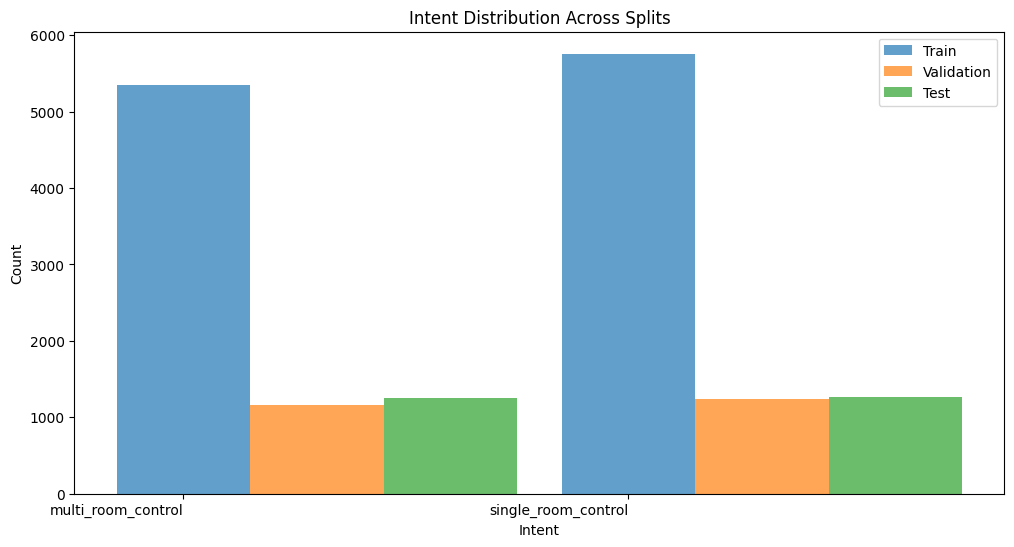

In [34]:
# Plot intent distribution
plot_distribution(train_intents, val_intents, test_intents, "Intent Distribution Across Splits", "Intent", "Count", rotation=0)

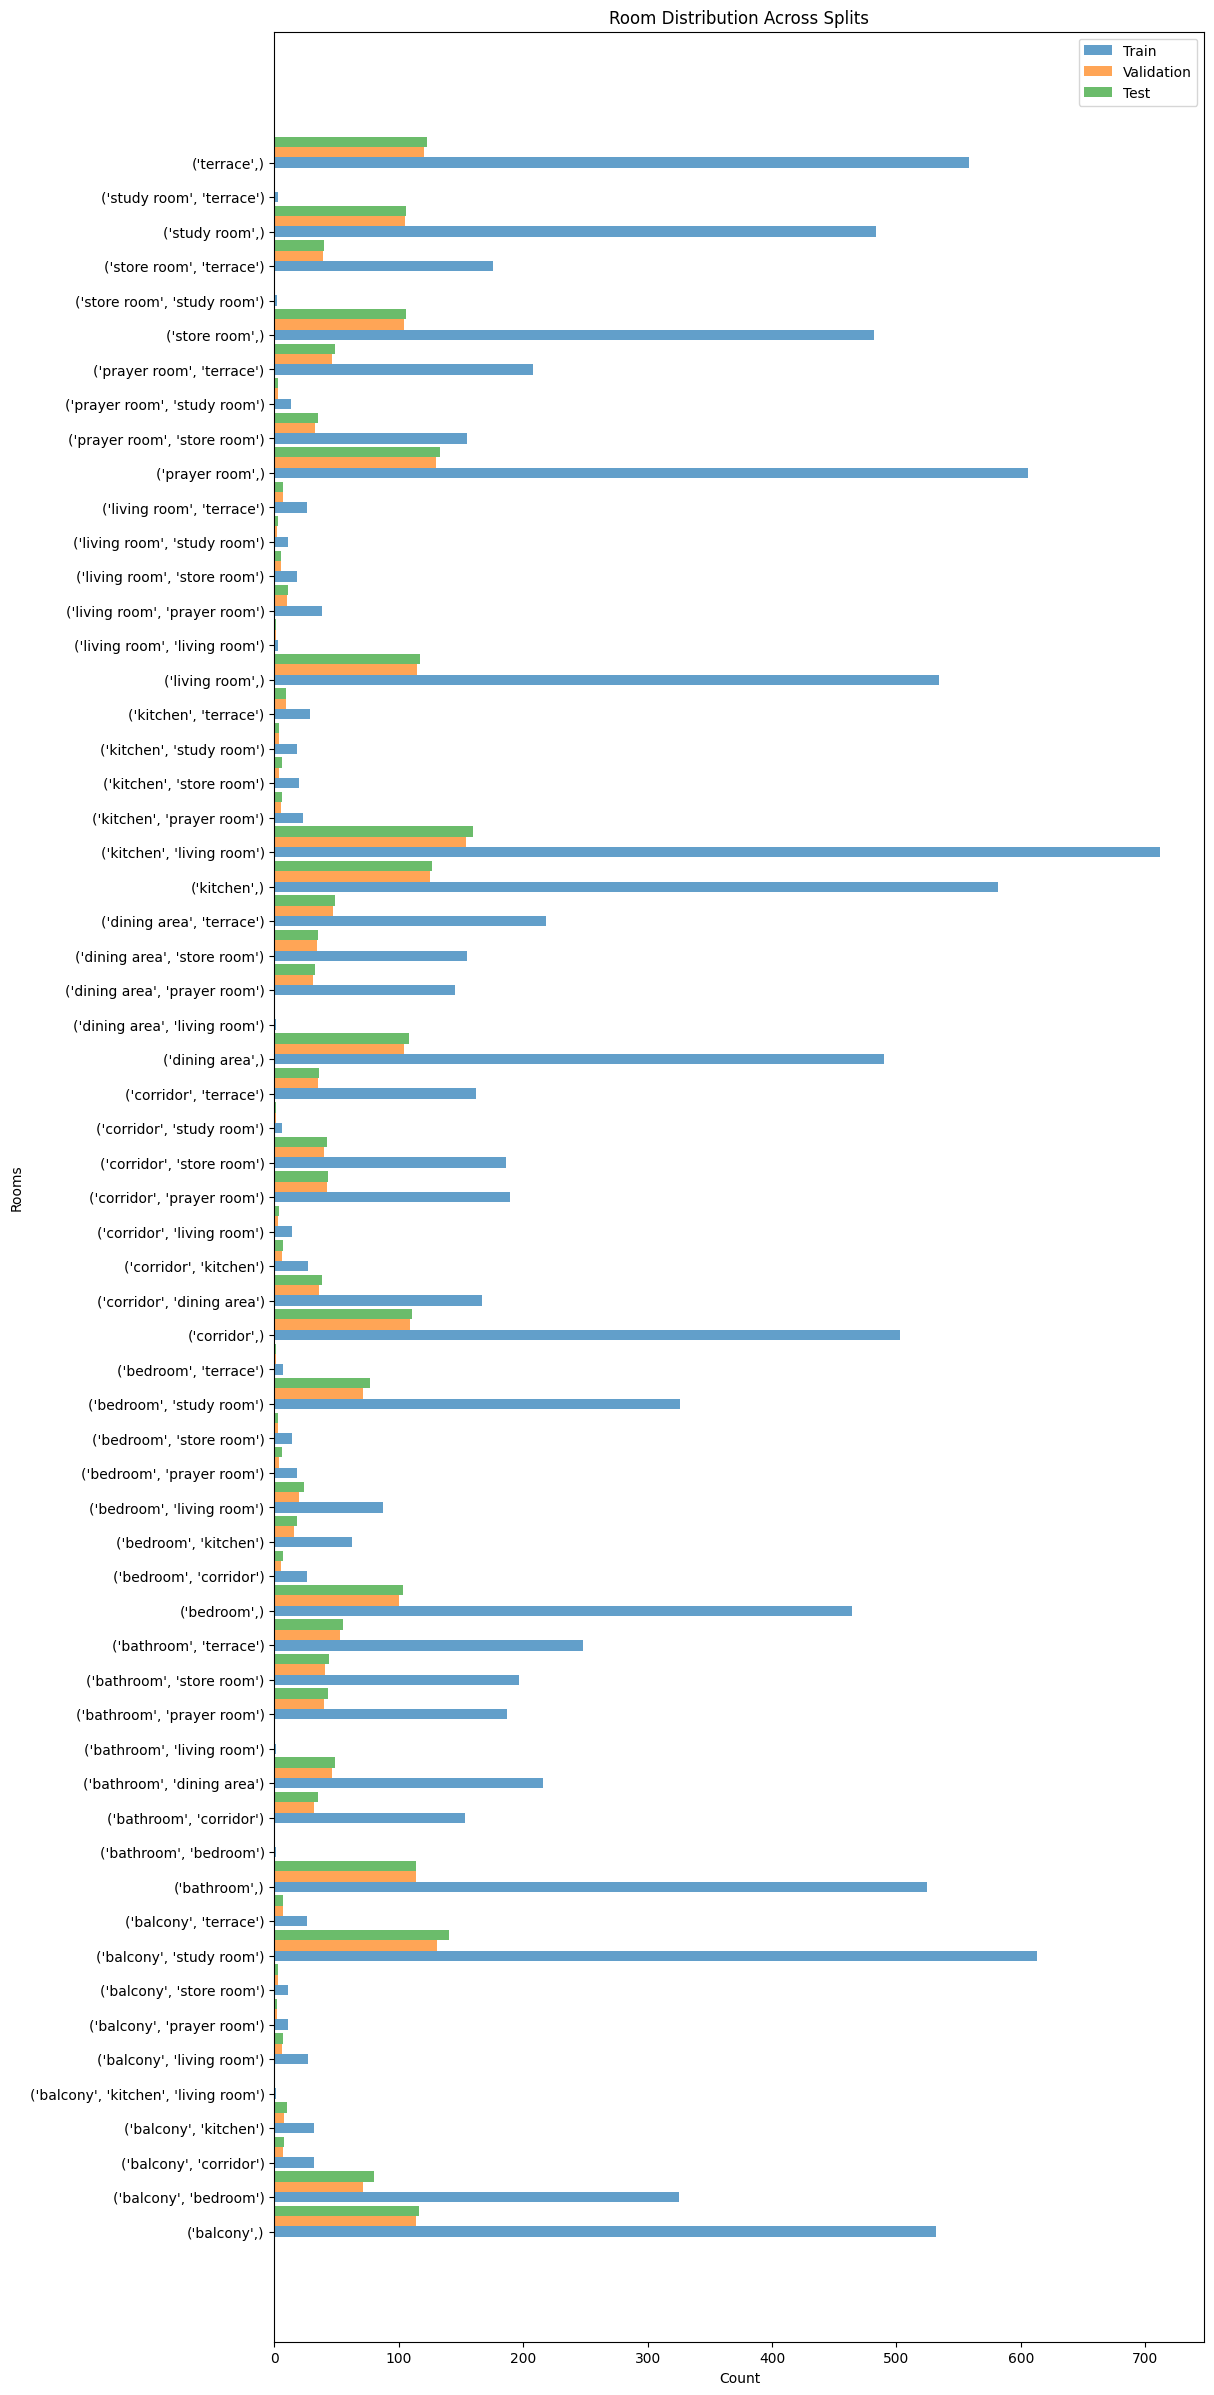

In [35]:
# Plot room distribution
plot_horizontal_distribution(train_rooms, val_rooms, test_rooms, 
                             "Room Distribution Across Splits", "Count", "Rooms")

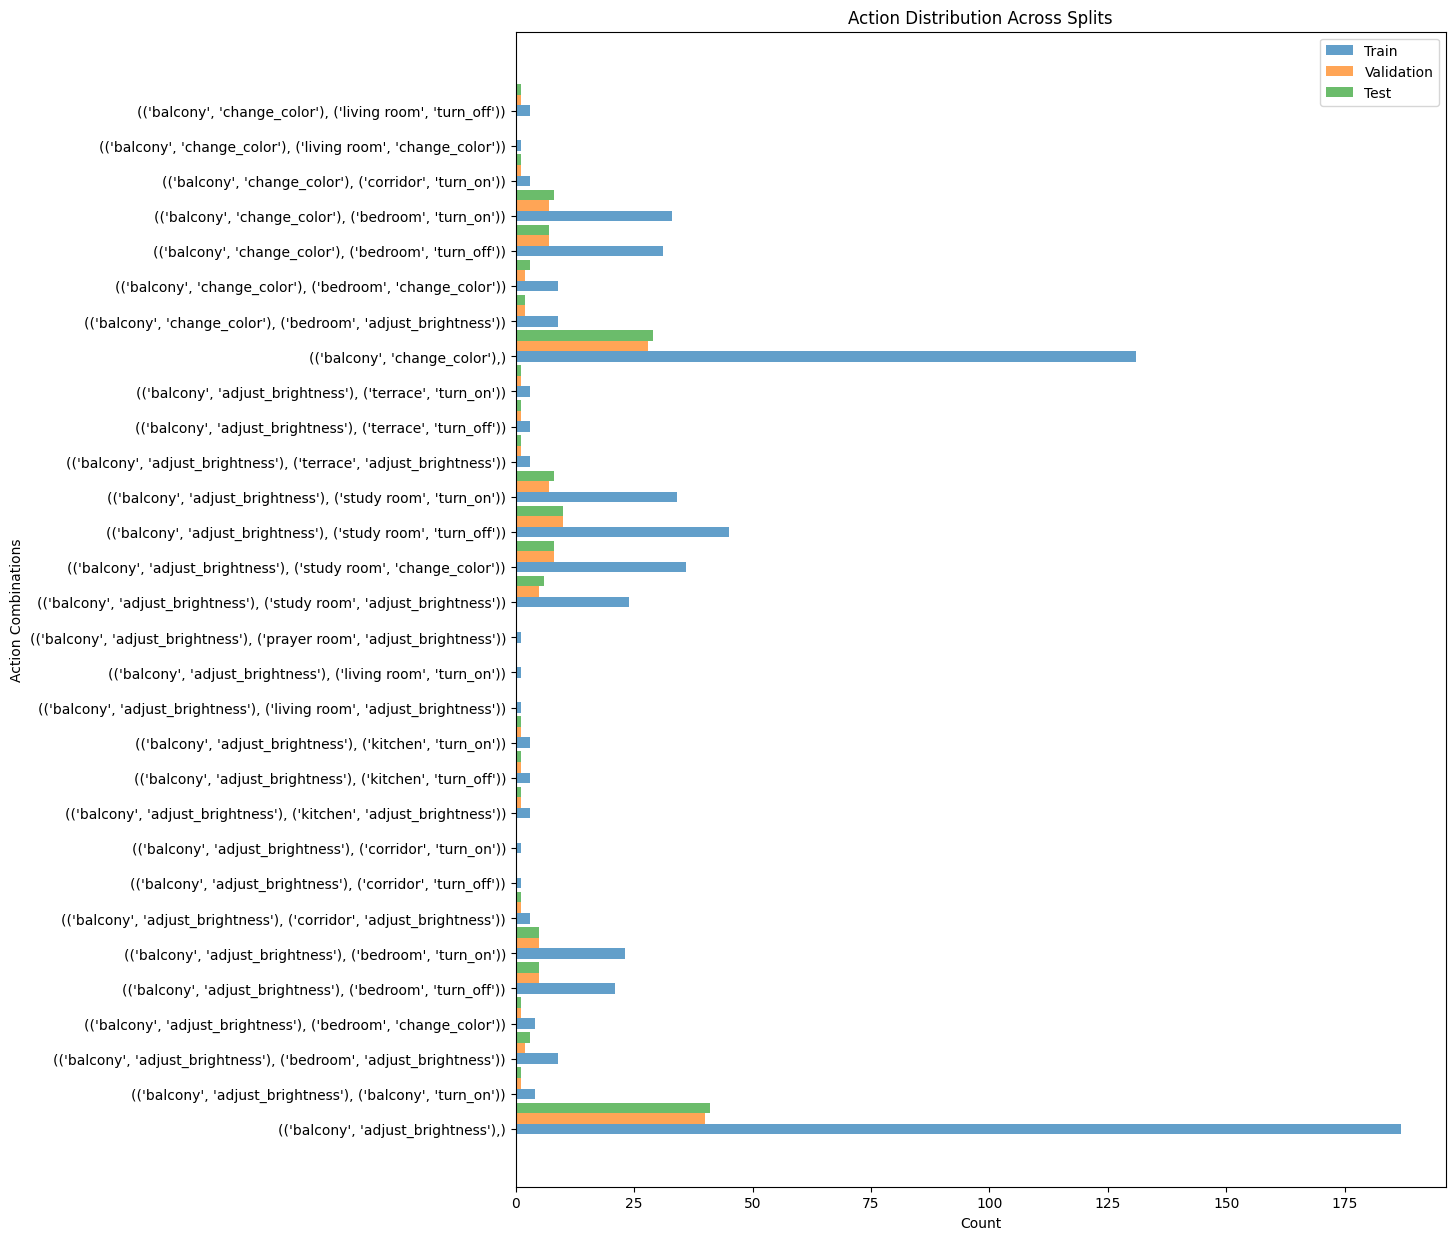

In [36]:
# Plot action distribution (limit to top 30 actions for readability)
plot_horizontal_distribution(train_actions, val_actions, test_actions, 
                             "Action Distribution Across Splits", "Count", "Action Combinations", limit=30)

In [37]:
from collections import Counter

# Count room occurrences in each split
train_room_counts = Counter(tuple(sorted(entry["rooms"])) for entry in train_data)
val_room_counts = Counter(tuple(sorted(entry["rooms"])) for entry in val_data)
test_room_counts = Counter(tuple(sorted(entry["rooms"])) for entry in test_data)

# Find rooms that exist in train but are missing in val/test
missing_in_val = {room for room in train_room_counts if room not in val_room_counts}
missing_in_test = {room for room in train_room_counts if room not in test_room_counts}

print(f"Rooms missing in validation set: {missing_in_val}")
print(f"Rooms missing in test set: {missing_in_test}")

Rooms missing in validation set: set()
Rooms missing in test set: set()


## Identifying missing actions,

In [39]:
from collections import Counter

# Count actions in each split
train_action_counts = Counter(tuple(sorted((action["room"], action["action"]) for action in entry["actions"])) for entry in train_data)
val_action_counts = Counter(tuple(sorted((action["room"], action["action"]) for action in entry["actions"])) for entry in val_data)
test_action_counts = Counter(tuple(sorted((action["room"], action["action"]) for action in entry["actions"])) for entry in test_data)

# Find actions missing in val/test
missing_actions_in_val = {action for action in train_action_counts if action not in val_action_counts}
missing_actions_in_test = {action for action in train_action_counts if action not in test_action_counts}

print(f"Actions missing in validation set: {missing_actions_in_val}")
print(f"Actions missing in test set: {missing_actions_in_test}")

Actions missing in validation set: {(('living room', 'change_color'), ('store room', 'turn_off')), (('store room', 'turn_off'), ('terrace', 'adjust_brightness')), (('prayer room', 'turn_off'), ('study room', 'turn_on')), (('living room', 'adjust_brightness'), ('study room', 'adjust_brightness')), (('living room', 'change_color'), ('store room', 'turn_on')), (('corridor', 'turn_on'), ('store room', 'turn_off')), (('bedroom', 'change_color'), ('living room', 'turn_off')), (('corridor', 'change_color'), ('terrace', 'turn_on')), (('terrace', 'adjust_brightness'), ('terrace', 'change_color')), (('bedroom', 'adjust_brightness'), ('store room', 'adjust_brightness')), (('corridor', 'change_color'), ('dining area', 'turn_on')), (('bedroom', 'turn_off'), ('kitchen', 'change_color')), (('kitchen', 'adjust_brightness'), ('store room', 'adjust_brightness')), (('balcony', 'adjust_brightness'), ('corridor', 'turn_off')), (('prayer room', 'adjust_brightness'), ('store room', 'turn_on')), (('dining are

In [41]:
# Move missing actions from train to validation/test
for entry in train_data[:]:  # Iterate over a copy to allow safe removal
    action_key = tuple(sorted((action["room"], action["action"]) for action in entry["actions"]))

    if action_key in missing_actions_in_val and action_key in missing_actions_in_test:
        # If it's missing in both validation and test and appears only once, duplicate it
        val_data.append(entry)
        test_data.append(entry)  # Duplicate for test
        missing_actions_in_val.remove(action_key)
        missing_actions_in_test.remove(action_key)

    elif action_key in missing_actions_in_val:
        val_data.append(entry)
        train_data.remove(entry)
        missing_actions_in_val.remove(action_key)

    elif action_key in missing_actions_in_test:
        test_data.append(entry)
        train_data.remove(entry)
        missing_actions_in_test.remove(action_key)

    if not missing_actions_in_val and not missing_actions_in_test:
        break  # Stop once all missing actions are fixed

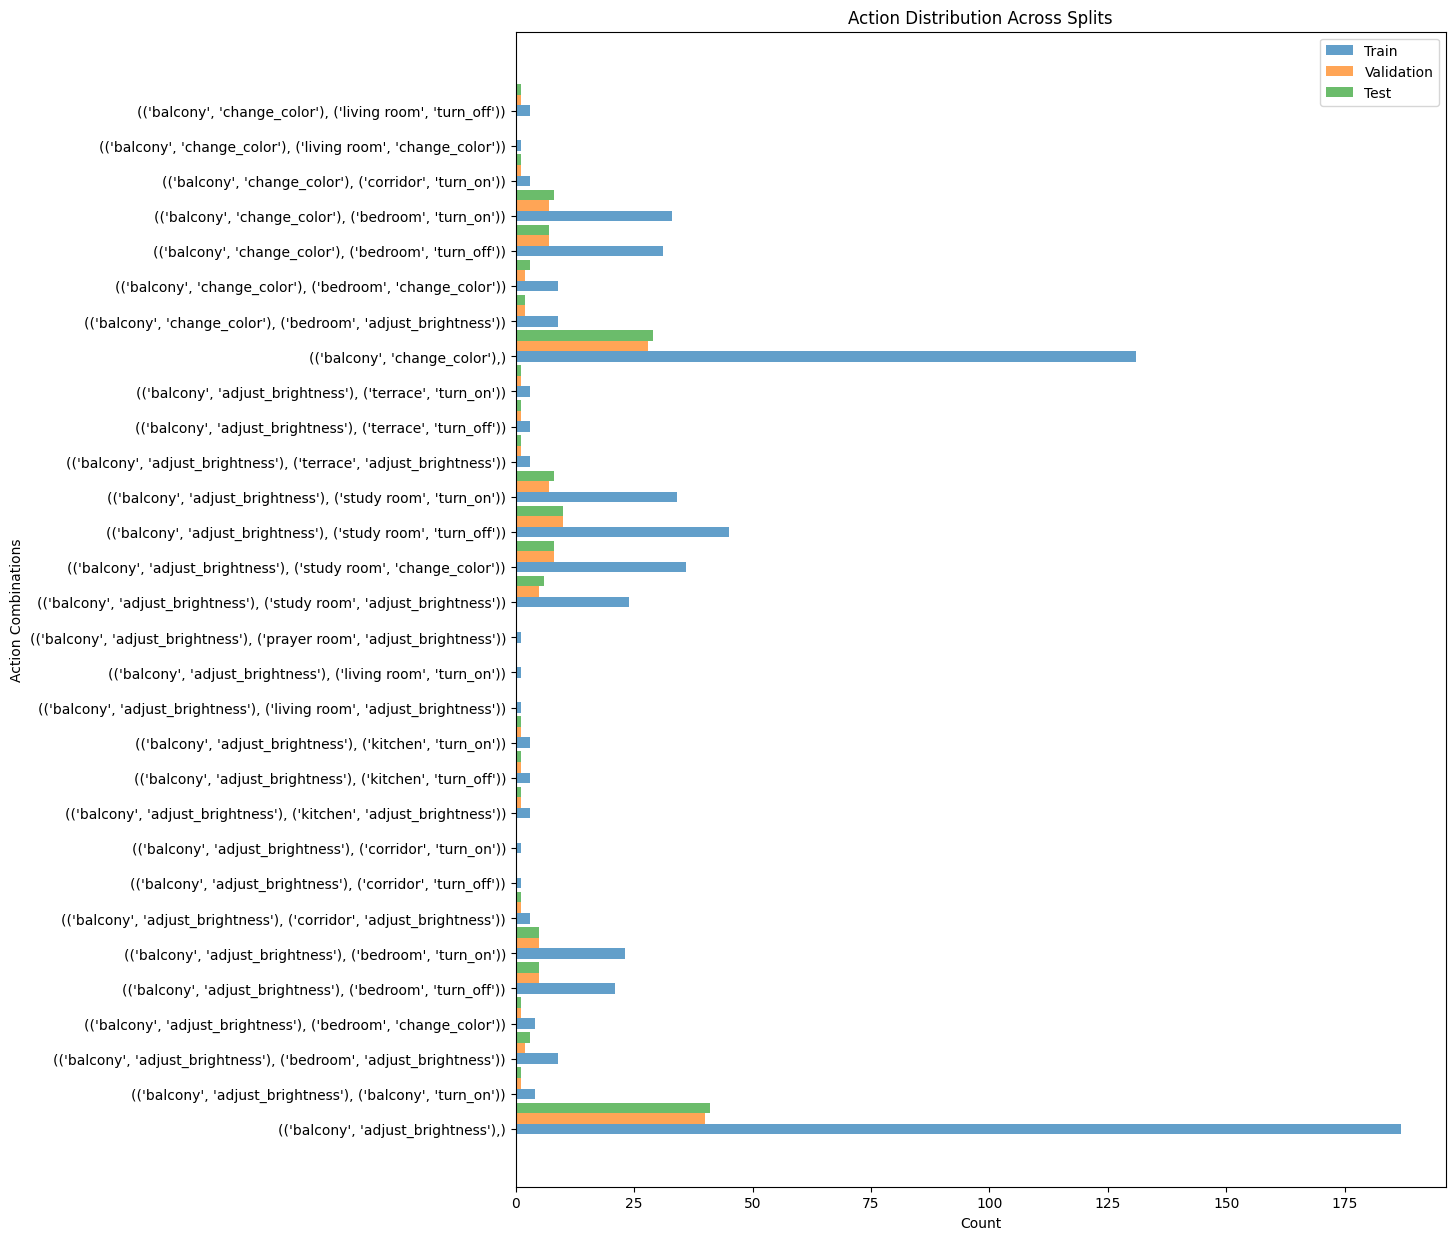

In [42]:
plot_horizontal_distribution(train_actions, val_actions, test_actions, 
                             "Action Distribution Across Splits", "Count", "Action Combinations", limit=30)

In [43]:
from collections import Counter

# Count actions in each split
train_action_counts = Counter(tuple(sorted((action["room"], action["action"]) for action in entry["actions"])) for entry in train_data)
val_action_counts = Counter(tuple(sorted((action["room"], action["action"]) for action in entry["actions"])) for entry in val_data)
test_action_counts = Counter(tuple(sorted((action["room"], action["action"]) for action in entry["actions"])) for entry in test_data)

# Find actions missing in val/test
missing_actions_in_val = {action for action in train_action_counts if action not in val_action_counts}
missing_actions_in_test = {action for action in train_action_counts if action not in test_action_counts}

print(f"Actions missing in validation set: {missing_actions_in_val}")
print(f"Actions missing in test set: {missing_actions_in_test}")

Actions missing in validation set: set()
Actions missing in test set: set()


In [44]:
# Display final dataset statistics
print(f"Final dataset sizes:")
print(f"Train: {len(train_data)} samples")
print(f"Validation: {len(val_data)} samples")
print(f"Test: {len(test_data)} samples")

# Count unique intents, rooms, and actions in each split
train_intents = {entry["intent"] for entry in train_data}
val_intents = {entry["intent"] for entry in val_data}
test_intents = {entry["intent"] for entry in test_data}

train_rooms = {room for entry in train_data for room in entry["rooms"]}
val_rooms = {room for entry in val_data for room in entry["rooms"]}
test_rooms = {room for entry in test_data for room in entry["rooms"]}

train_actions = {action["action"] for entry in train_data for action in entry["actions"]}
val_actions = {action["action"] for entry in val_data for action in entry["actions"]}
test_actions = {action["action"] for entry in test_data for action in entry["actions"]}

print("\nUnique categories in each split:")
print(f"Intents - Train: {len(train_intents)}, Val: {len(val_intents)}, Test: {len(test_intents)}")
print(f"Rooms - Train: {len(train_rooms)}, Val: {len(val_rooms)}, Test: {len(test_rooms)}")
print(f"Actions - Train: {len(train_actions)}, Val: {len(val_actions)}, Test: {len(test_actions)}")


Final dataset sizes:
Train: 11104 samples
Validation: 2549 samples
Test: 2655 samples

Unique categories in each split:
Intents - Train: 2, Val: 2, Test: 2
Rooms - Train: 11, Val: 11, Test: 11
Actions - Train: 4, Val: 4, Test: 4


The dataset is now properly split and balanced based on the final validation results. Here's why:

- Key Takeaways
Train, Validation, and Test sizes are correctly proportioned

- Train: 11,104 (~70%)
- Validation: 2,549 (~15%)
- Test: 2,655 (~15%)

Matches expected split ratios (~70-15-15), All categories are present in each split

- Intents: 2 in all sets (No missing intent)
- Rooms: 11 in all sets (No missing room)
- Actions: 4 in all sets (No missing action)
No categories are missing in validation or test

This ensures better generalization during fine-tuning.

In [50]:
import json
import os

# Define file names
split_files = {
    "train.json": train_data,
    "val.json": val_data,
    "test.json": test_data
}

# Save each split to a JSON file
root_dir = "../../data/splittedData"

for filename, data in split_files.items():
    with open(os.path.join(root_dir, filename), "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4, ensure_ascii=False)

print("✅ Final dataset splits saved successfully!")

✅ Final dataset splits saved successfully!
